# 8. 회귀 트리
* 회귀 트리 개요
 * 사이킷런의 결정 트리 및 결정 트리 기반의 앙상블 알고리즘은 분류 뿐만 아니라 회귀도 가능
 * 이는 트리가 CART(Classification and Regression Tree)를 기반으로 만들어졌기 때문
 * CART는 분류 뿐만 아니라 회귀도 가능한 트리 분할 알고리즘
 * CART 회귀 트리는 분류와 유사하게 분할을 하며, 최종 분할이 완료된 후에 각 분할 영역에 있는 데이터 결정값들의 평균값으로 학습/예측<br><br>
 
* 회귀 트리 프로세스
 * 변수는 x만 있다고 가정<br>
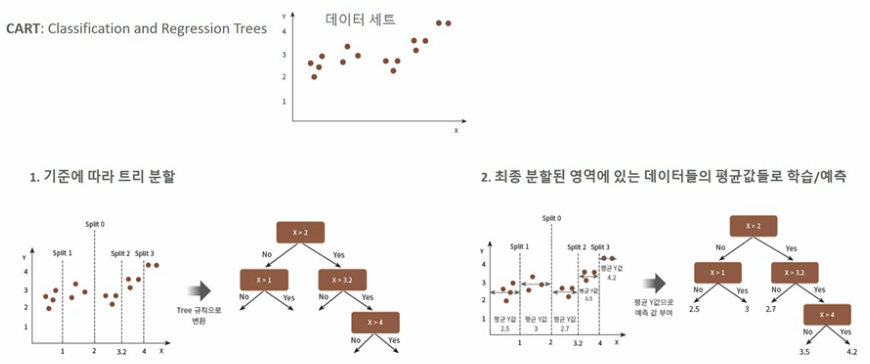<br><br>

* 사이킷런의 회귀 트리 지원<br>
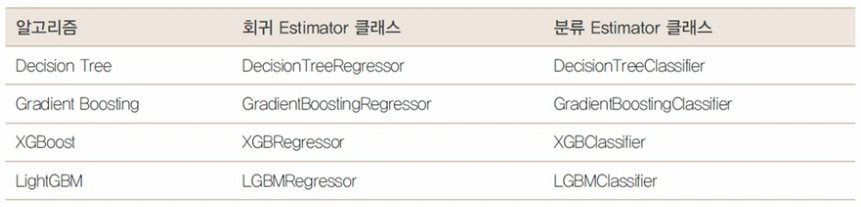<br><br>

* 회귀 트리의 오버 피팅
 * 회귀 트리 역시 복잡한 트리 구조를 가질 경우 오버 피팅하기 쉬우므로 트리의 크기와 노드 개수의 제한 등의 방법을 통해 오버 피팅을 개선할 수 있음<br>
 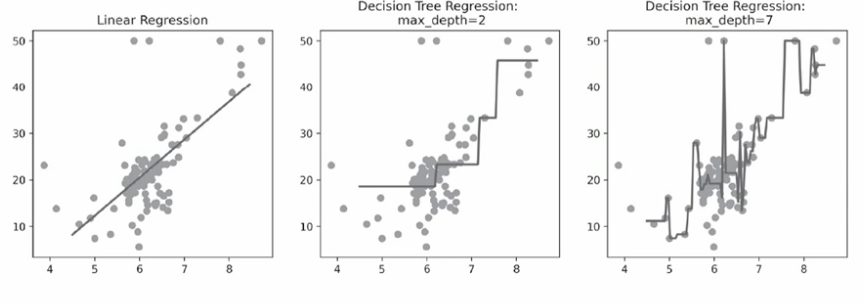<br><br>
 
* 결정 트리, 랜덤 포레스트, GBM, XGBoost, LightGBM 등의 분류에서 소개한 모든 트리 기반의 알고리즘은 분류 뿐만 아니라 회귀도 가능
* 이는 트리 생성이 CART 알고리즘에 기반하고 있기 때문

* 랜덤 포레스트 회귀 트리를 이용해 보스턴 주택 가격 예측 수행

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') # 사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거

# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

rf = RandomForestRegressor(random_state = 0, n_estimators = 1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE scores :', np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 RMSE scores :', np.round(rmse_scores, 2))
print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 교차 검증의 개별 Negative MSE scores : [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores : [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE : 4.423


* 랜덤 포레스트 뿐만 아니라 결정트리, GBM, XGBoost, LightGBM의 Regressor를 모두 이용해 보스턴 주택 가격 예측 수행
 * get_model_cv_prediction()은 입력 모델과 데이터 세트를 입력받아 교차 검증으로 평균 RMSE를 계산해주는 함수

In [3]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('#####', model.__class__.__name__, '#####') # 모델명 출력
    print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state = 0, max_depth = 4)
rf_reg = RandomForestRegressor(random_state = 0, n_estimators = 1000)
gb_reg = GradientBoostingRegressor(random_state = 0, n_estimators = 1000)
xgb_reg = XGBRegressor(n_estimators = 1000)
lgb_reg = LGBMRegressor(n_estimators = 1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

##### DecisionTreeRegressor #####
5 교차 검증의 평균 RMSE : 5.978
##### RandomForestRegressor #####
5 교차 검증의 평균 RMSE : 4.423
##### GradientBoostingRegressor #####
5 교차 검증의 평균 RMSE : 4.269
##### XGBRegressor #####
5 교차 검증의 평균 RMSE : 4.251
##### LGBMRegressor #####
5 교차 검증의 평균 RMSE : 4.646


=> 회귀 트리 Regressor 클래스는 선형 회귀와 다른 처리 방식이므로 회귀 계쑤를 제공하는 coef_ 속성이 없음<br>
=> 대신 feature_importances_를 이용해 피처별 중요도 파악

* feature_importances_를 이용해 보스턴 주택 가격 모델의 피처별 중요도 시각화

<AxesSubplot:>

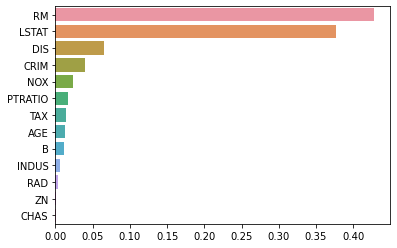

In [6]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators = 1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data = rf_reg.feature_importances_, index = X_data.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

* 회귀 트리 Regressor가 어떻게 예측값을 판단하는지 선형 회귀와 비교해 시각화
 * 결정 트리의 하이퍼 파라미터인 max_depth의 크기를 변화시키면서 어떻게 회귀 트리의 예측선이 변화하는지 살펴봄
 * 회귀 예측선을 쉽게 표현하기 위해 Price와 가장 밀접한 양의 상관관계를 가지는 RM 칼럼만 이용해 선형 회귀와 결정 트리 회귀로 PRICE 예측 회귀선 표현

(100, 2)


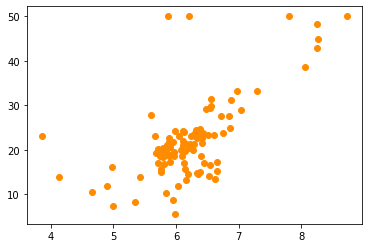

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n = 100, random_state = 0) # 데이터 세트 개수를 100개만 샘플링
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = 'darkorange')

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성, DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth = 2)
rf_reg7 = DecisionTreeRegressor(max_depth = 7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5까지 100개 데이터셋 생성
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1, 1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

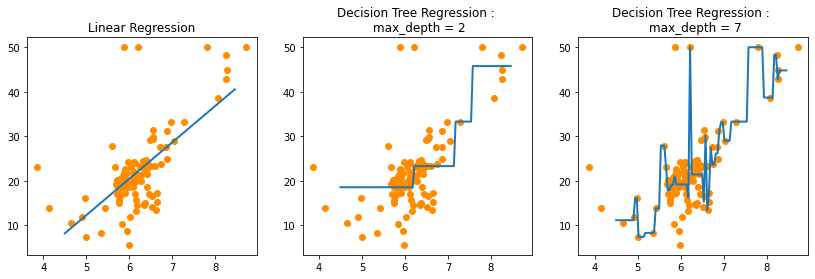

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (14, 4), ncols = 3)

# x축값을 4.5 ~ 8.5로 변환하여 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = 'darkorange')
ax1.plot(X_test, pred_lr, label = 'linear', linewidth = 2)

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression : \n max_depth = 2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = 'darkorange')
ax2.plot(X_test, pred_rf2, label = 'max_depth : 2', linewidth = 2)

# DecisionTreeRegressor의 max_depth로 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression : \n max_depth = 7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = 'darkorange')
ax3.plot(X_test, pred_rf7, label = 'max_depth : 7', linewidth = 2)

=> 선형 회그는 직선으로 예측 회귀선을 표현하는 데 반해, 회귀 트리의 경우 분할되는 데이터 지점에 따라 브랜치를 만들면서 계딴 형태로 회귀선을 만듦<br>
=> DecisionTreeRegressor의 max_depth = 7인 경우에는 학습 데이터 세트의 이상치 데이터도 학습하면서 복잡한 계단 형태의 회귀선을 만들어 과적합이 되기 쉬운 모델이 되었음

# 9. 회귀 실습 - 자전거 대여 수요 예측
* 자전거 대여 수요 예측에서 사용된 학습 데이터 세트를 이용해 선형 회귀와 트리 기반 회귀를 비교

### 데이터 클렌징 및 가공

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

bike_df = pd.read_csv('./bike_train.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


### 주요 컬럼 설명
* datetime : hourly date + timestamp
* season : 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
* holiday : 1 = 토, 일요일의 주말을 제외한 국경일 등의 휴일, 0 = 휴일이 아닌 날
* workingday : 1 = 토, 일요일의 주말 및 휴일이 아닌 주중, 0 = 주말 및 휴일
* weather :
 * 1 = 맑음, 약간 구름 낀 흐림
 * 2 = 안개, 안개 + 흐림
 * 3 = 가벼운 눈, 가벼운 비 + 천둥
 * 4 = 심한 눈/비, 천둥/번개
* temp : 온도(섭씨)
* atemp : 체감온도(섭씨)
* humidity : 상대습도
* windspeed : 풍속
* casual : 사전에 등록되지 않는 사용자가 대여한 횟수
* registered : 사전에 등록된 사용자가 대여한 횟수
* count : 대여 횟수

In [14]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


=> Null 데이터는 없고, 대부분의 칼럼이 int, float 숫자형인데, datetime만 object 형<br>
=> datetime 칼럼의 경우 년-월-일 시:분:초의 형식이므로 가공이 필요

* datetime 열 가공

In [15]:
# 문자열을 datetime 타입으로 변경
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x: x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x: x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x: x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


* 불필요한 컬럼 제거
 * casual + registered = count이므로 따로 각각 필요하지 않음
 * 오히려 상관도가 높아 예측을 저해할 우려가 있으므로 삭제

In [16]:
drop_columns = ['datetime', 'casual', 'registered'] # casual, registered는 타겟값을 바로 예측할 수 있는 피처이므로 drop
bike_df.drop(drop_columns, axis = 1, inplace = True)

* 주요 칼럼별로 target 값인 count가 어떻게 분포되어 있는지 시각화

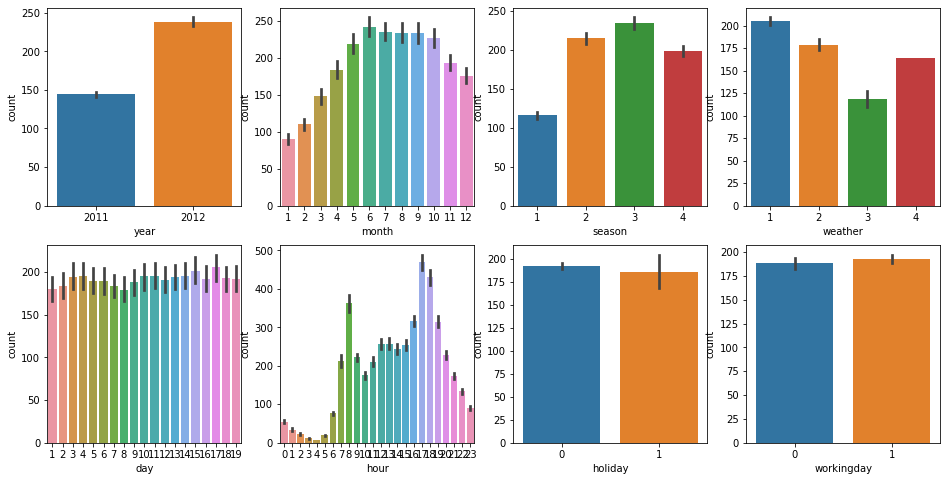

In [18]:
fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)
cat_features = ['year', 'month', 'season', 'weather', 'day', 'hour', 'holiday', 'workingday']

# cat_features에 있는 모든 컬럼별로 개별 컬럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i / 4)
    col = i % 4
    # seaborn의 barplot을 이용해 칼럼값에 따른 count의 합을 표현
    sns.barplot(x = feature, y = 'count', data = bike_df, ax = axs[row][col])

=> year은 2011년보다 2012년에 대여횟수가 높음, 시간이 지날수록 자전거 대여 횟수가 지속적으로 증가한 결과<br>
=> month는 1, 2, 3월이 낮고, 6, 7, 8, 9월이 높음<br>
=> season은 봄, 겨울이 낮고, 여름, 가을이 높음<br>
=> weather의 경우 눈 또는 비가 있는 경우(3, 4)가 낮고, 맑거나 안개가 약간 있는 경우(1, 2)가 높음<br>
=> hour의 경우 오전 출근 시간인 8시와 퇴근 시간은 5, 6시가 상대적으로 높음<br>
=> holiday, workingday는 각 카테고리별로 큰 차이를 보이지 않음

* 예측 성능 평가를 위한 성능 평가 함수 생성

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN들의 이슈로 log()가 아닌 log1p()를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_squared_error()를 이용하여 RMSE 계산
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

# MSE, RMSE, RMSLE를 모두 계산
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    # MAE는 scikit learn의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE :{2:.3f}'.format(rmsle_val, rmse_val, mae_val))

### 로그 변환, 피처 인코딩, 모델 학습/예측/평가

* 사이킷런 LinearRegression 객체를 이용한 회귀 예측 (전처리 x)

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state = 0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE : 1.165, RMSE : 140.900, MAE :105.924


=> 실제 target 데이터 값인 count를 감안하면 예측 오류로서는 비교적 큰 값

* 실제값과 예측값이 어느 정도 차이가 나는지 비교

In [21]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수와 예측값을 서로 비교할 수 있도록 생성
    result_df = pd.DataFrame(y_test.values, columns = ['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값의 차이가 가장 큰 데이터 순으로 출력
    print(result_df.sort_values('diff', ascending = False)[:n_tops])
    
get_top_error_data(y_test, pred, n_tops = 5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


=> 상위 5위 오류값은 546 ~ 568로 실제값을 감안하면 예측 오류가 꽤 큼<br>
=> 회귀에서 이렇게 큰 예측 오류가 발생할 경우 가장 먼저 살펴볼 것은 target 값의 분포가 왜곡된 형태를 이루고 있는지 확인

* target 값이 정규분포를 이루는지 hist()를 통해 확인

<AxesSubplot:>

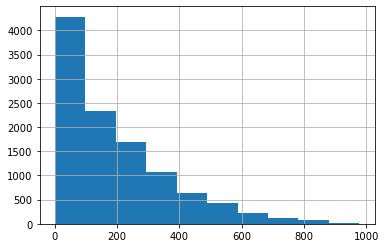

In [22]:
y_target.hist()

* 로그 변환

<AxesSubplot:>

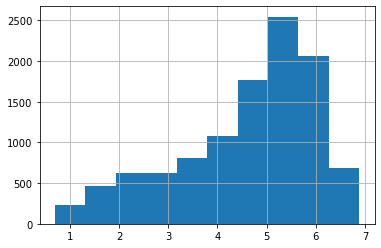

In [23]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

=> 완전한 정규분포 형태는 아니지만 변환하기 전보다는 왜곡 정도가 많이 향상됨

* target값을 로그 변환 후 학습 및 평가 수행

In [24]:
# 타깃 컬럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size = 0.3, random_state = 0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터셋의 target 값은 log 변환되었으므로 다시 expm1을 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측값 역시 log 변환된 타깃 기반으로 학습되어 예측되었으므로 다시 expm1으로 scale 변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE : 1.017, RMSE : 162.594, MAE :109.286


=> RMSLE는 줄어들었지만, RMSE는 오히려 늘어남

* 각 회귀 계수값 시각화

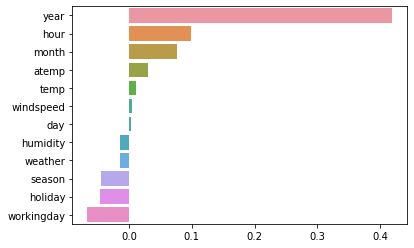

In [25]:
coef = pd.Series(lr_reg.coef_, index = X_features.columns)
coef_sort = coef.sort_values(ascending = False)
sns.barplot(x = coef_sort.values, y = coef_sort.index)
plt.savefig('log_transform.tif', format = 'tif', dpi = 300, bbox_inches = 'tight')

=> year의 회귀 계수 영향도가 상대적으로 높음

* 카테고리형 피처에 대한 원핫인코딩 적용

In [33]:
# 'year', 'month', 'day', 'hour' 등의 피처들을 one hot encoding
# pd.get_dummies에서 columns를 따로 지정하면 지정한 column에 대해서만 인코딩 수행
X_features_ohe = pd.get_dummies(X_features, columns = ['year', 'month', 'day', 'hour',
                                                       'holiday', 'workingday', 'season', 'weather'])

* 사이킷런의 선형 모델인 LinearRegression, Ridge, Lasso 적용 후 예측 성능 확인
 * 모델, 학습/테스트 데이터 세트를 입력하면 성능 평가 수치를 반환하는 get_model_predict() 함수 생성

In [34]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size = 0.3, random_state = 0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###', model.__class__.__name__, '###')
    evaluate_regr(y_test, pred)

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha = 10)
lasso_reg = Lasso(alpha = 0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = True)

### LinearRegression ###
RMSLE : 0.590, RMSE : 97.687, MAE :63.382
### Ridge ###
RMSLE : 0.590, RMSE : 98.529, MAE :63.893
### Lasso ###
RMSLE : 0.635, RMSE : 113.219, MAE :72.803


=> 원핫인코딩 적용 후 선형 회귀의 예측 성능이 많이 향상

* 회귀 계수 상위 20개 피처 추출 후 시각화

<AxesSubplot:>

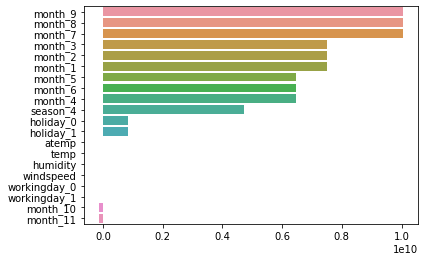

In [35]:
coef = pd.Series(lr_reg.coef_, index = X_features_ohe.columns)
coef_sort = coef.sort_values(ascending = False)[:20]
sns.barplot(x = coef_sort.values, y = coef_sort.index)

=> 원핫인코딩을 통해 피처들의 영향도가 달라짐<br>
=> 반드시 그런 것은 아니지만 선형 회귀의 경우 중요 카테고리성 피처들은 원-핫 인코딩으로 변환하는 것은 성능에 중요한 영향을 미칠 수 있음

* 회귀 트리를 이용한 회귀 예측
 * target 값의 로그 변환된 값과 원핫인코딩된 피처 데이터 세트를 이용

In [36]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators = 500)
gbm_reg = GradientBoostingRegressor(n_estimators = 500)
xgb_reg = XGBRegressor(n_estimators = 500)
lgbm_reg = LGBMRegressor(n_estimators = 500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력될 경우 버전에 따라 오류 발생 가능, ndarray로 변환
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1 = True)

### RandomForestRegressor ###
RMSLE : 0.354, RMSE : 50.165, MAE :31.122
### GradientBoostingRegressor ###
RMSLE : 0.330, RMSE : 53.342, MAE :32.746
### XGBRegressor ###
RMSLE : 0.342, RMSE : 51.732, MAE :31.251
### LGBMRegressor ###
RMSLE : 0.319, RMSE : 47.215, MAE :29.029


=> 선형 회귀 모델보다 회귀 예측 성능이 개선됨<br>
=> 하지만 데이터 세트의 유형에 따라 언제든 결과는 얼마든지 달라질 수 있음

# 10. 회귀 실습 - 캐글 주택 가격 : 고급 회귀 기법<br>
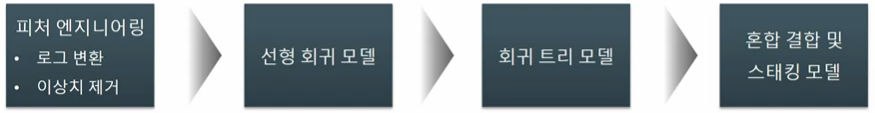

### 데이터 사전 처리(Preprocessing)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('house_price.csv')
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


* 데이터 타입과 Null 값 갯수 확인

In [2]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
print('데이터 세트의 shape', house_df.shape)
print('\n전체 feature 들의 type \n', house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 컬럼과 그 건수 :\n', isnull_series[isnull_series > 0].sort_values(ascending = False))

데이터 세트의 shape (1460, 81)

전체 feature 들의 type 
 object     43
int64      35
float64     3
dtype: int64

Null 컬럼과 그 건수 :
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


=> 데이터 세트 크기, 피처의 타입, Null 값 분포를 확인 가능하며, Null 값이 너무 많은 피처는 추후 드롭

* 타겟값 SalePrice 분포도 확인

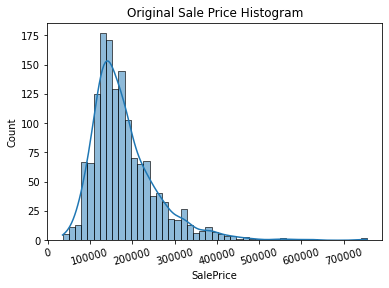

In [4]:
plt.title('Original Sale Price Histogram')
plt.xticks(rotation = 15)
sns.histplot(house_df['SalePrice'], kde = True)
plt.show()

=> 데이터 값의 분포가 중심에서 왼쪽으로 치우친 형태로, 정규 분포에서 벗어나 있음

* 로그 변환을 통해 SalePrice 값 분포도 확인
 * 예측 시 다시 결괏값을 expm1()으로 추후에 환원

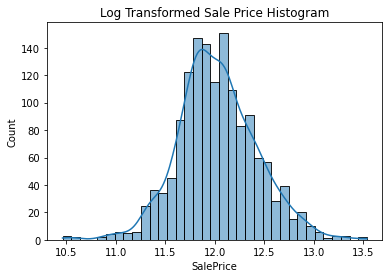

In [5]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.histplot(log_SalePrice, kde = True)
plt.show()

=> target 값 로그 변환 후 정규 분포 형태로 결괏값이 분포함을 확인

* 타겟값인 Price를 로그 변환하여 정규 분포 형태로 변환하고, 피처들 중 숫자형 컬럼의 Null 값 데이터 처리

In [6]:
# SalePrice 로그 변환
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# Null이 너무 많은 컬럼들과 불필요한 컬럼 삭제
house_df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1, inplace = True)

# drop 하지 않는 숫자형 Null 컬럼들은 평균값으로 대체
# mean() 함수는 자동으로 숫자형 컬럼만 추출하여 칼럼별 평균값을 Series 객체로 반환
house_df.fillna(house_df.mean(), inplace = True)

# Null 값이 있는 피처명과 타입을 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


=> 문자형 피처를 제외하고는 Null 값이 없음

* 문자열 값은 모두 카테고리값, 판다스의 get_dummies()를 이용하여 원핫인코딩 수행
 * pd.get_dummies()는 null 값을 반영하여 자동 원핫인코딩 수행

In [7]:
s1 = ['a', 'b', np.nan]
pd.get_dummies(s1)

,a,b
0,1,0
1,0,1
2,0,0


=> pd.get_dummies()를 이용하면 자동으로 문자열 피처를 원핫인코딩 변환하면서 Null 값은 모든 인코딩 값이 0으로 변환되는 방식으로 대체해주므로 별도의 Null 값을 대체하는 로직이 필요없음

In [8]:
print('get_dummies() 수행 전 데이터 shape :', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 shape :', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('## Null 피처의 type : \n', house_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 shape : (1460, 75)
get_dummies() 수행 후 데이터 shape : (1460, 271)
## Null 피처의 type : 
 Series([], dtype: object)


### 선형 회귀 모델의 학습/예측/평가
* RMSE 평가 함수 생성 타겟값을 로그 변환하여, 학습한 모델은 예측값도 원본 데이터에 로그 스케일로 예측함
* 실제 타겟값도 로그값, 예측값도 로그값이므로 RMSE를 적용하면 자연스럽게 RMSLE로 적용됨

In [9]:
# 학습이 완료된 모델을 인자로 받아서 테스트 데이터로 예측하고 RMSE를 계산
def get_rmse(model):
    pred = model.predict(X_test)
    # y_test, pred는 로그 스케일
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE : {1}'.format(model.__class__.__name__, np.round(rmse, 3)))
    return rmse

# 여러 모델들을 list 형태로 인자로 받아서 개별 모델들의 RMSE를 list로 반환
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

* LinearRegression, Ridge, Lasso 학습/예측/평가

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE : 0.132
Ridge 로그 변환된 RMSE : 0.128
Lasso 로그 변환된 RMSE : 0.176


[0.13189576579154352, 0.12750846334053045, 0.17628250556471395]

=> 라쏘 회귀의 경우 회귀 성능이 타 회귀 방식보다 많이 떨어지는 결과가 나옴<br>
=> 라쏘의 경우 최적 하이퍼 파라미터 튜닝이 필요해 보임

* 회귀 계수값과 컬럼명 시각화를 위해 상위 10개, 하위 10개 회귀 계수값과 컬럼명을 가지는 Series 생성 함수

In [11]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성, index는 컬럼명
    coef = pd.Series(model.coef_, index = X_features.columns)
    
    # 상위 10개, 하위 10개 coefficient를 추출하여 반환
    coef_high = coef.sort_values(ascending = False).head(10)
    coef_low = coef.sort_values(ascending = False).tail(10)
    return coef_high, coef_low

* 인자로 입력되는 여러 개의 회귀 모델들에 대한 회귀 계수값과 컬럼명 시각화

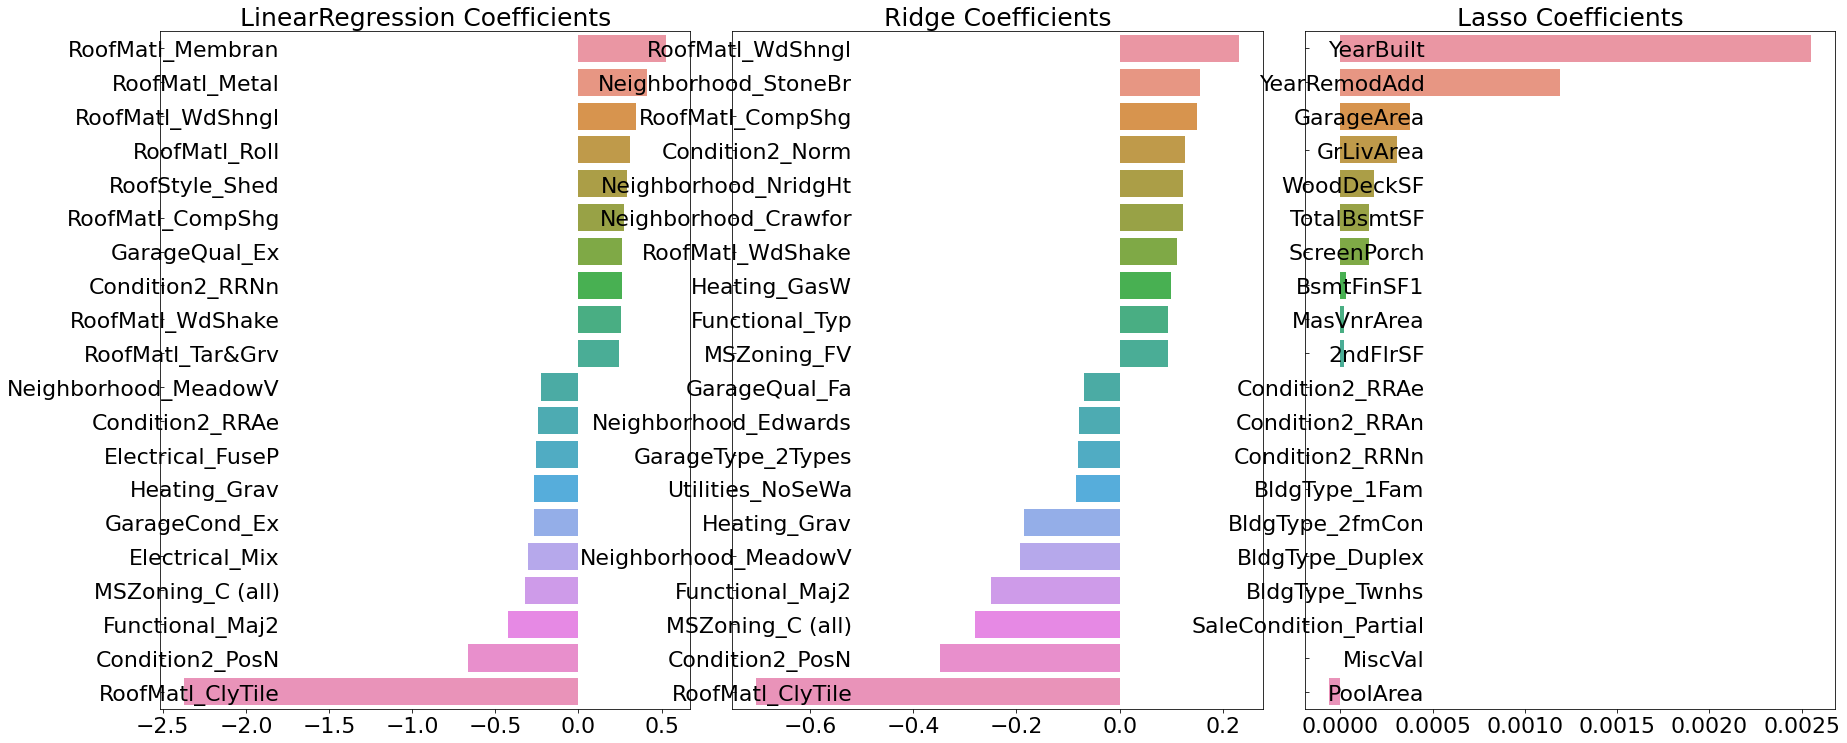

In [12]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize = (24, 10), nrows = 1, ncols = 3)
    fig.tight_layout()
    # 입력 인자로 받은 list 객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        # 순차적으로 ax subplot에 barchar로 표현
        # 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정
        axs[i_num].set_title(model.__class__.__name__+' Coefficients', size = 25)
        axs[i_num].tick_params(axis = 'y', direction = 'in', pad = -120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x = coef_concat.values, y = coef_concat.index, ax = axs[i_num])
        
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

=> LinearRegression, Ridge의 경우 회귀 계수가 유사한 형태로 분포되어 있으나 Lasso의 경우 전체적으로 회귀 계수값이 매우 작음<br>
=> 데이터 분할에 대한 문제인지 확인하기 위해 train_test_split이 아닌 5 교차 검증 폴드 세트로 분할해 평균 RMSE를 측정

* 5 폴드 교차검증으로 모델별로 RMSE와 평균 RMSE 출력

In [13]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score() 수행
        # 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring = 'neg_mean_squared_error', cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트 : {1}'.format(model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값 : {1}'.format(model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 ridge_reg, lasso_reg 모델의 CV RMSE 값 출력
models = [ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


Ridge CV RMSE 값 리스트 : [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE 값 : 0.144

Lasso CV RMSE 값 리스트 : [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE 값 : 0.198


=> 5개의 폴드 세트로 학습한 후 평가해도 여전히 라쏘의 경우 릿지 모델보다 성능이 떨어짐<br>
=> 따라서, alpha 하이퍼 파라미터를 변화시키면서 최적값을 도출

* 각 모델들의 alpha 값을 변경하면서 하이퍼 파라미터 튜닝 후 다시 학습/예측/평가

In [14]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid = params,
                              scoring = 'neg_mean_squared_error', cv = 5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값 : {1}, 최적 alpha : {2}'.format(model.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값 : 0.1418, 최적 alpha : {'alpha': 12}
Lasso 5 CV 시 최적 평균 RMSE 값 : 0.142, 최적 alpha : {'alpha': 0.001}


=> Lasso 모델의 경우 최적화 이후 예측 성능이 많이 좋아짐

LinearRegression 로그 변환된 RMSE : 0.132
Ridge 로그 변환된 RMSE : 0.124
Lasso 로그 변환된 RMSE : 0.12


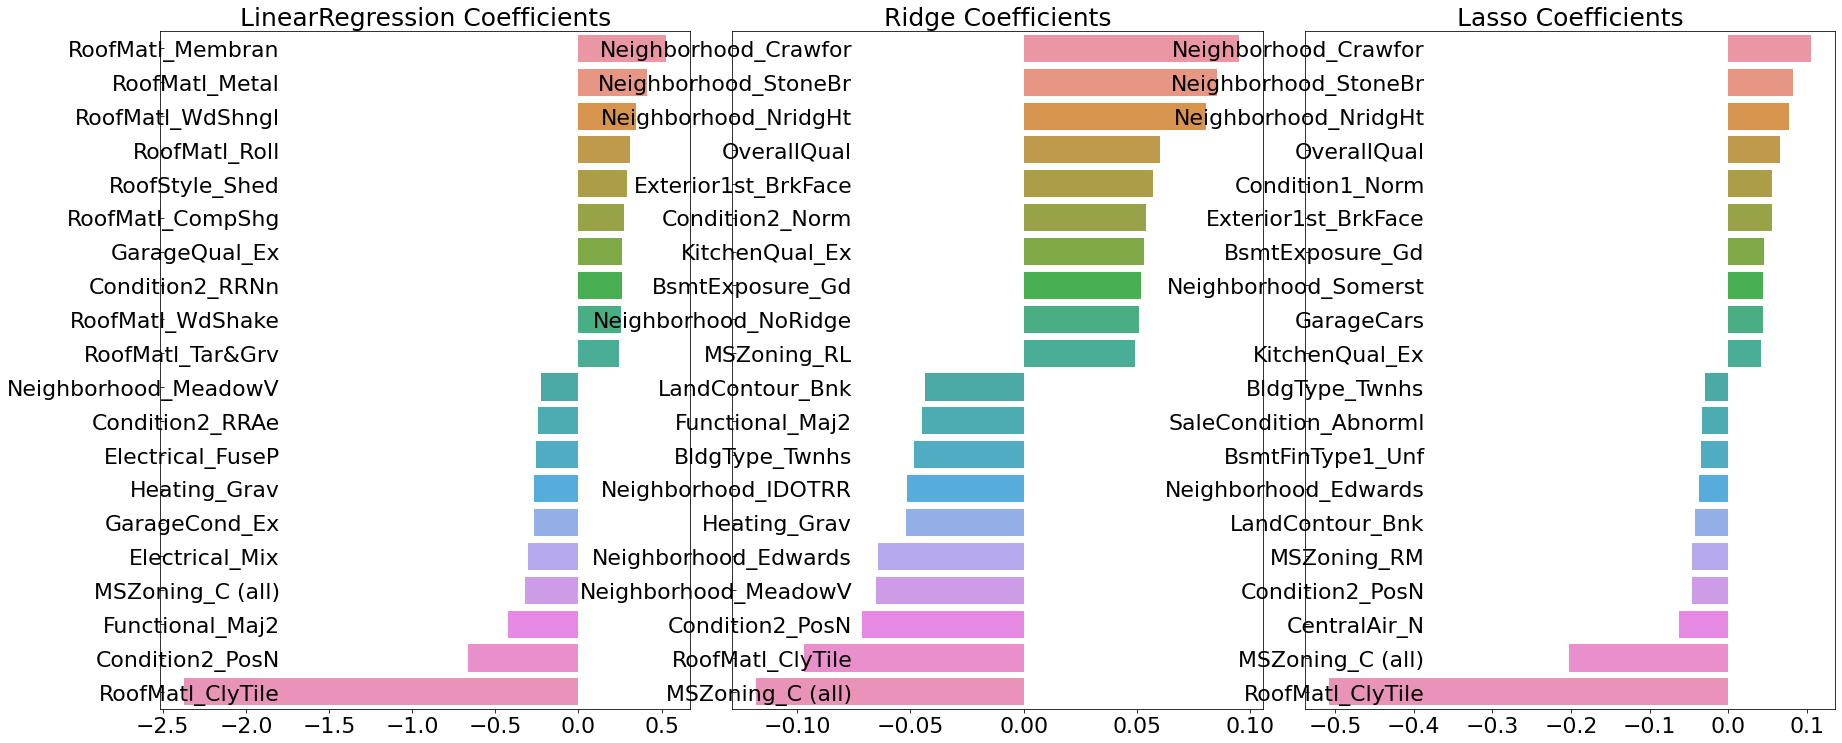

In [15]:
# 앞의 최적화 alpha 값으로 학습 데이터 학습, 테스트 데이터 예측 및 평가 수행
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha = 12)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

=> alpha 최적화 후 테스트 데이터 세트의 예측 성능이 더 좋아짐<br>
=> 다만, 라쏘 모델의 경우는 릿지에 비해 동일한 피처라도 회귀 계수의 값이 상당히 작은 것을 볼 수 있음

* 숫자 피처들에 대한 데이터 분포 왜곡도 확인 후 높은 왜곡도를 가지는 피처 추출<br><br>
 * skew 유형에 따른 변환 방법<br>
 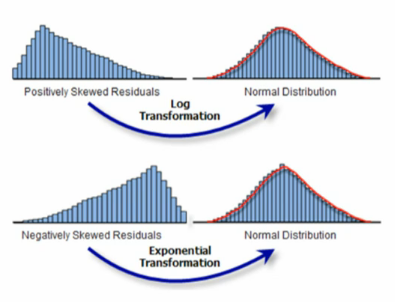
   * right skew된 경우는 로그 변환을 적용
     * 일상 업무의 데이터는 right skew 된 경우가 많음
     * 음수 값이 포함된 데이터는 로그 변환될 수 없음, 이 경우 최소 음수 값에 해당되는 양수 값을 일괄적으로 더해서 보정 후 변환
     * 학습 데이터를 보정하여 스케일 변환하면 테스트 데이터도 동일하게 변환해야 함
   * left skew된 경우는 Exponential/Power 변환을 적용<br><br>

 * skewness(왜도)의 이해<br>
 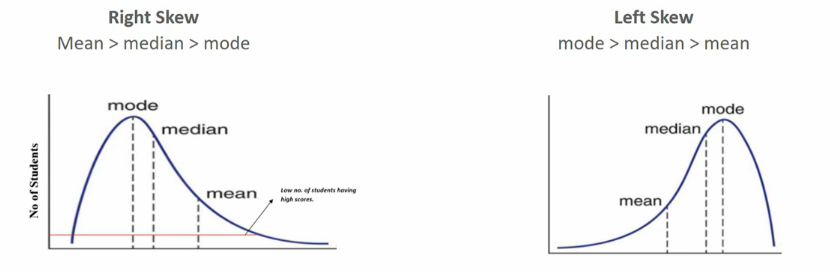
   * -0.5 ~ 0.5 사이는 대칭에 가까움
   * -1보다 작거나(left skew) 또는 1보다 클 경우(right skew) 왜도가 심함

* 피처 데이터에서 skew된 데이터 검출
 * 단, 주의할 점은 skew()를 적용할 숫자형 피처에서 원핫인코딩된 카테고리 숫자형 피처는 제외해야 함 => 따라서, DataFrame은 원핫인코딩이 적용되지 않은 house_df를 사용해야 함

In [21]:
from scipy.stats import skew

# object가 아닌 숫자형 피처의 컬럼 index 객체 추출
features_index = house_df.dtypes[house_df.dtypes != 'object'].index
# house_df에 컬럼 index를 []로 입력하면 해당하는 컬럼 데이터셋 반환
# apply lambda로 skew() 호출
skew_features = house_df[features_index].apply(lambda x: skew(x))
# skew 정도가 1 이상인 컬럼들만 추출
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending = False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


* 왜곡도가 1 이상인 피처들은 로그 변환 적용하고 다시 하이퍼 파라미터 튜닝후 학습/예측/평가

In [27]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [28]:
# skew가 높은 피처들은 로그 변환했으므로 다시 원핫인코딩 적용 및 피처/타겟 데이터셋 생성
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 156)

# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값 : 0.1275, 최적 alpha : {'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값 : 0.1252, 최적 alpha : {'alpha': 0.001}


=> 릿지 모델의 경우 최적 alpha 값이 12에서 10으로 변경됐고, 두 모델의 RMSE 값이 향상되었음

LinearRegression 로그 변환된 RMSE : 0.128
Ridge 로그 변환된 RMSE : 0.122
Lasso 로그 변환된 RMSE : 0.119


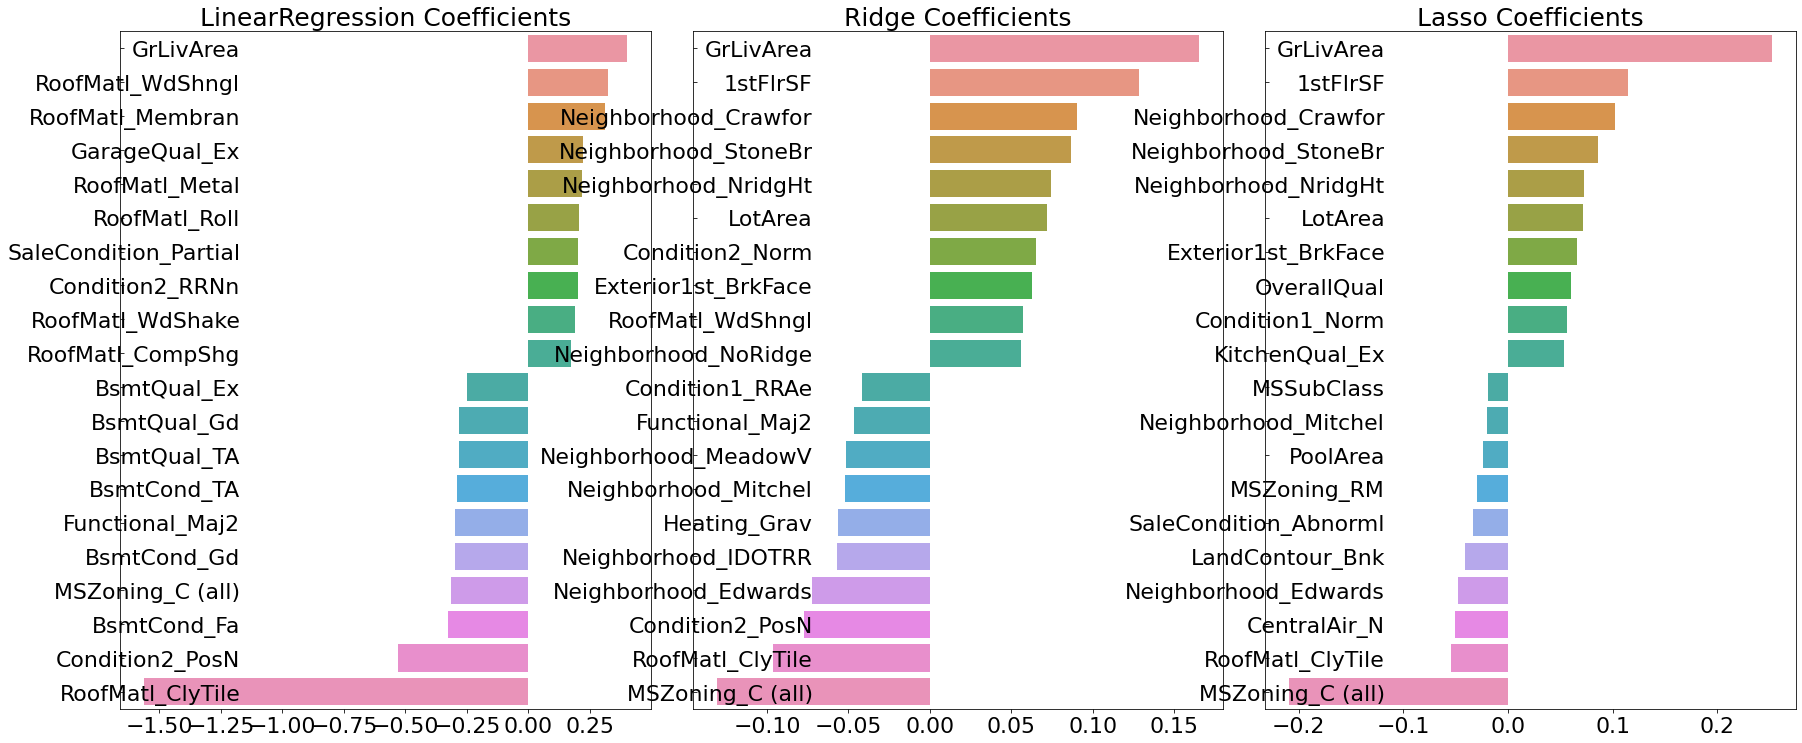

In [29]:
# 앞의 최적화 alpha 값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha = 10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

=> 시각화 결과를 보면 세 모델 모두 GrLivArea, 즉 주거 공간 크기가 회귀 계수가 가장 높은 피처가 되었음<br>
=> 주거 공간의 크기가 주택 가격에 미치는 영향이 당연히 제일 높을 것이라는 상식선의 결과가 도출됨

* 이상치 데이터 검출을 위해 주요 피처인 GrLivArea 값에 대한 산점도 확인

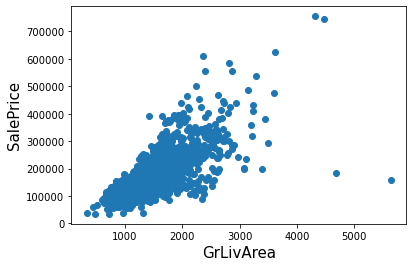

In [30]:
plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize = 15)
plt.xlabel('GrLivArea', fontsize = 15)
plt.show()

* 이상치 데이터 삭제 후 재 학습/예측/평가
 * 위 scatter plot을 기반으로 GrLivArea가 4000평방피트 이상이고, 가격이 500,000달러 이하인 데이터는 모두 이상치로 간주하고 삭제

In [31]:
house_df_ohe['GrLivArea']

0       7.444833
1       7.141245
2       7.488294
3       7.448916
4       7.695758
          ...   
1455    7.407318
1456    7.637234
1457    7.758333
1458    6.983790
1459    7.136483
Name: GrLivArea, Length: 1460, dtype: float64

In [32]:
# GrLivArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('아웃라이어 레코드 index', outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape :', house_df_ohe.shape)

# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제
house_df_ohe.drop(outlier_index, axis = 0, inplace = True)
print('아웃라이어 삭제 후 house_df_ohe shape :', house_df_ohe.shape)

아웃라이어 레코드 index [ 523 1298]
아웃라이어 삭제 전 house_df_ohe shape : (1460, 271)
아웃라이어 삭제 후 house_df_ohe shape : (1458, 271)


=> 두 개의 데이터가 이상치로 발견되었고, 이를 삭제해 전체 레코드가 2개 줄었음

In [34]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 156)

ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값 : 0.1125, 최적 alpha : {'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값 : 0.1122, 최적 alpha : {'alpha': 0.001}


=> 단 두 개의 이상치만 제거했는데도 예측 수치가 상당히 향상됨<br>
=> 그리고 릿지 모델의 경우 최적 alpha는 12에서 8로 변함

LinearRegression 로그 변환된 RMSE : 0.129
Ridge 로그 변환된 RMSE : 0.103
Lasso 로그 변환된 RMSE : 0.1


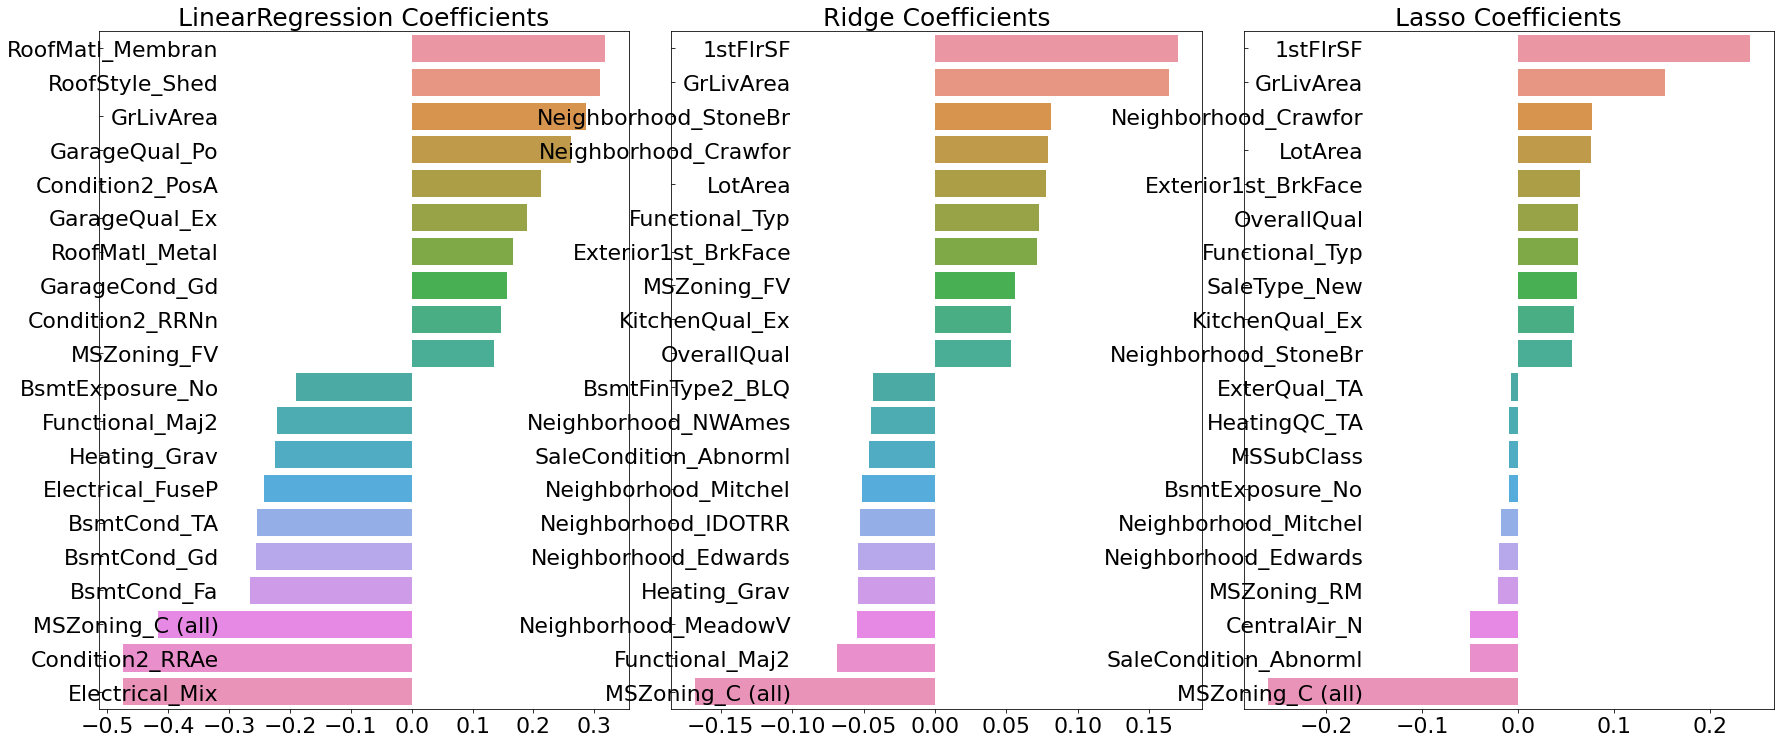

In [35]:
# 앞의 최적화 alpha 값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha = 8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

### 회귀 트리 학습/예측/평가

* XGBoost, LightGBM 학습/예측/평가

In [37]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators = 1000, learning_rate = 0.05, 
                       colsample_bytree = 0.5, subsample = 0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값 : 0.1178, 최적 alpha : {'n_estimators': 1000}


In [39]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators = 1000, learning_rate = 0.05, num_leaves = 4,
                         subsample = 0.6, colsample_bytree = 0.4, reg_lambda = 10, n_jobs = -1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값 : 0.1163, 최적 alpha : {'n_estimators': 1000}


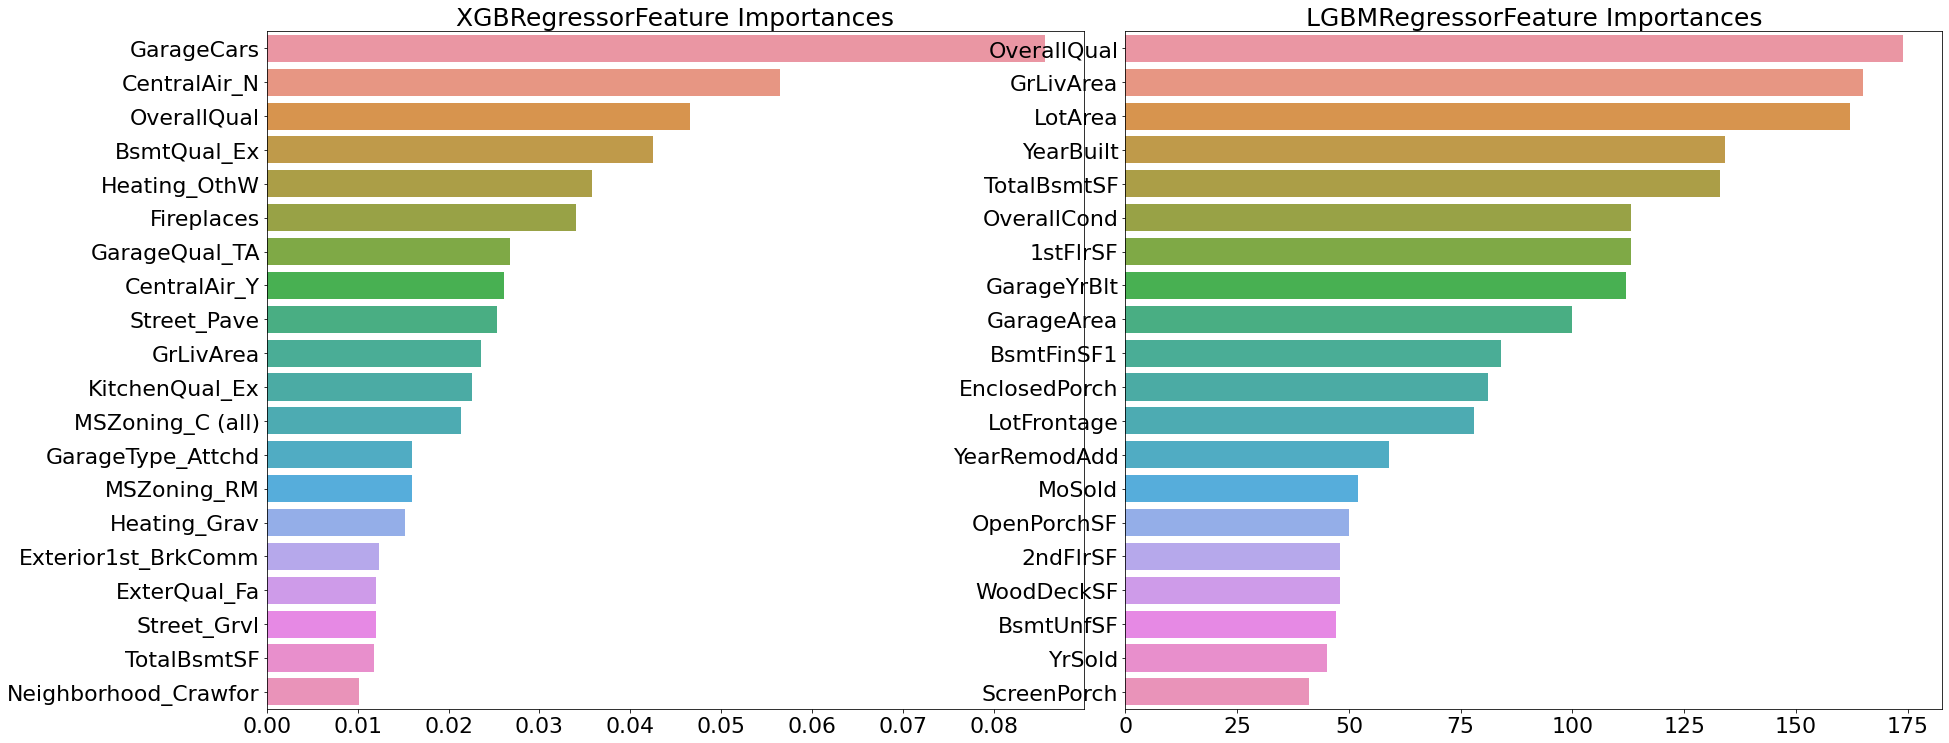

In [41]:
# 모델의 중요도 상위 20개의 피처명과 그 때의 중요도값을 Series로 반환
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index = X_features.columns)
    ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
    return ftr_top20

def visualize_ftr_importances(model):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize = (24, 10), nrows = 1, ncols = 2)
    fig.tight_layout()
    # 입력인자로 받은 list 객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그 때의 중요도 값 추출
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__ + 'Feature Importances', size = 25)
        # font 크기 조정
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x = ftr_top20.values, y = ftr_top20.index, ax = axs[i_num])
        
# 앞 예제에서 print_best_params()가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

### 회귀 모델들의 예측 결과 혼합을 통한 최종 예측

In [43]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test, pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE : {1}'.format(key, rmse))
        
# 개별 모델의 학습
ridge_reg = Ridge(alpha = 8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train, y_train)

# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합' : pred,
        'Ridge' : ridge_pred,
        'Lasso' : lasso_pred}

# 최종 혼합 모델, 개별 모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE : 0.10007930884470519
Ridge 모델의 RMSE : 0.10345177546603272
Lasso 모델의 RMSE : 0.10024170460890039


In [46]:
xgb_reg = XGBRegressor(n_estimators = 1000, learning_Rate = 0.05,
                       colsample_bytree = 0.5, subsample = 0.8)
lgbm_reg = LGBMRegressor(n_estimators = 1000, learning_rate = 0.05, num_leaves = 4,
                         subsample = 0.6, colsample_bytree = 0.4, reg_lambda = 10, n_jobs = -1)

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합' : pred,
        'XGBM' : xgb_pred,
        'LGBM' : lgbm_pred}

get_rmse_pred(preds)

[15:36:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learning_Rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


최종 혼합 모델의 RMSE : 0.11221783268274924
XGBM 모델의 RMSE : 0.13567520185170492
LGBM 모델의 RMSE : 0.10382510019327311


### 스태킹 모델을 통한 회귀 예측

In [49]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [50]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
[15:43:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learning_Rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


	 폴드 세트:  1  시작 
[15:43:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learning_Rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter a

In [51]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용. 
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.09806287532090124


# 11. 정리
* 선형 회귀와 비용 함수 RSS
* 경사 하강법
* 다항회귀와 과소적합/과대적합
* 규제 - L2 규제를 사용한 릿지, L1 규제를 사용한 라쏘, L1과 L2 규제가 결합된 엘라스틱넷 회귀
* 분류를 위한 로지스틱 회귀
* CART 기반의 회귀 트리
* 왜곡도 개선을 위한 데이터 변환과 원-핫인코딩
* 실습 예제를 통한 데이터 정제와 변환 그리고 선형회귀/회귀트리/혼합모델/스태킹 모델의 학습/예측/평가 비교